# Data pre-processing

## Preparation

In [0]:
import os
import json
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

Using TensorFlow backend.


In [0]:
# before use data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# get the work directory
os.chdir('/content/gdrive/My Drive/STAT-628-3')
# show the files in the wd
print('The work directory contains:')
!ls

The work directory contains:
business.json  images		models	     tip.json
data	       load_data.ipynb	review.json  user.json


In [0]:
# # check ram
# !cat /proc/meminfo

## Load the data

In [0]:
# load the data from .json files
def load_json(filename):
    '''
    Load the give .json files to a data frame for STAT-628-Module-3
    '''
    res = [] # list of dicts
    with open(filename, 'r') as f:
        try:
            while True:
                line = f.readline()
                if line:
                    res.append(json.loads(line))
                    del line
                else:
                    break
        except:
            f.close()
    
    output = pd.DataFrame.from_dict(res) # list of dicts -> data frame
    del res

    return output

### Business

In [0]:
# load business file into a data frame
business = load_json('business.json')
business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."


In [0]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,38.541803,-97.594785,3.585627,33.538962,0.823040
std,4.941964,16.697725,1.018458,110.135224,0.381635
min,33.204642,-115.493471,1.000000,3.000000,0.000000
25%,33.637408,-112.274677,3.000000,4.000000,1.000000
50%,36.144815,-111.759323,3.500000,9.000000,1.000000
75%,43.602989,-79.983614,4.500000,25.000000,1.000000
max,51.299943,-72.911982,5.000000,8348.000000,1.000000


In [0]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [0]:
business['categories'].value_counts()[:50]

Restaurants, Pizza                                    1042
Nail Salons, Beauty & Spas                            1031
Pizza, Restaurants                                     993
Beauty & Spas, Nail Salons                             947
Food, Coffee & Tea                                     888
Mexican, Restaurants                                   885
Coffee & Tea, Food                                     865
Restaurants, Mexican                                   853
Chinese, Restaurants                                   840
Hair Salons, Beauty & Spas                             831
Beauty & Spas, Hair Salons                             819
Restaurants, Chinese                                   789
Automotive, Auto Repair                                585
Auto Repair, Automotive                                534
Food, Grocery                                          492
Grocery, Food                                          491
Restaurants, Italian                                   4

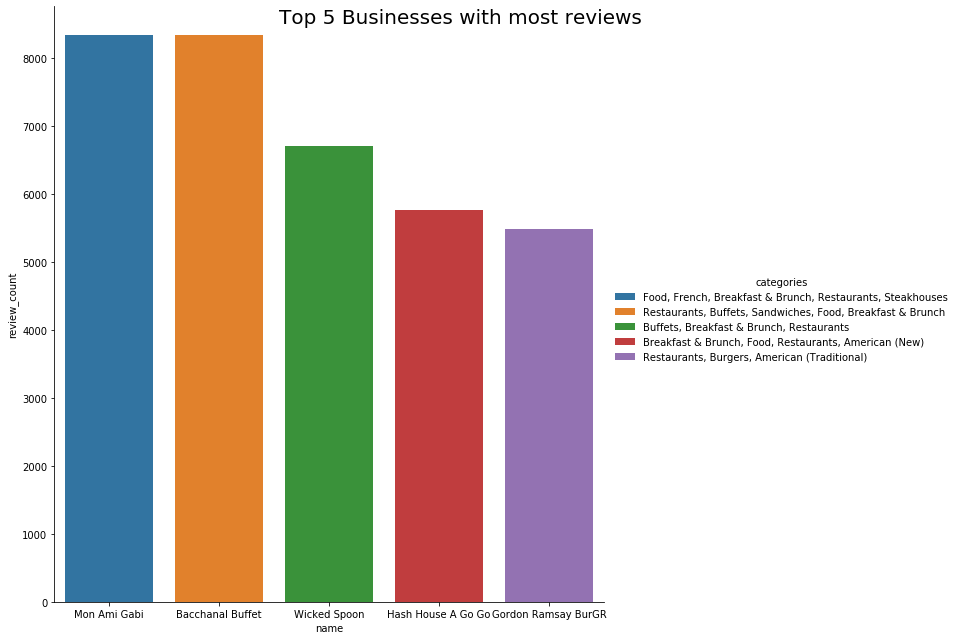

In [0]:
busi_catplot = sns.catplot(x="name", y="review_count", data = business.nlargest(5,'review_count'), kind="bar", hue = 'categories', height = 9, dodge = False);
busi_catplot.fig.suptitle('Top 5 Businesses with most reviews', fontsize=20);
plt.savefig("images/busi_catplot.jpg")

In [0]:
# we choose "Mexican food" as our theme
# use the "Mexican" part of the data frame

# obtain the businesses about mexican food
categoric = list(set(business['categories']))
categoric.remove(None)
mexican_list = []
for line in categoric:
    if 'Mexican' in line: # or word in line.split() to search for full words
        mexican_list.append(line)

busi_mexi = business.loc[business["categories"].isin(mexican_list),:]
busi_mexi.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'..."
96,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


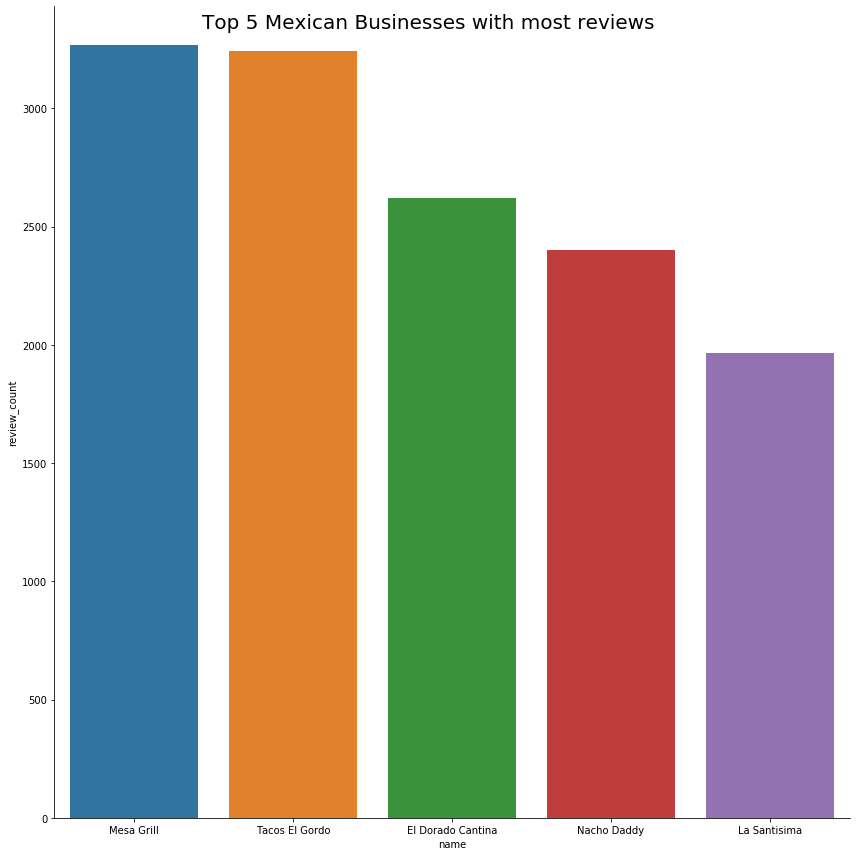

In [0]:
mexi_catplot = sns.catplot(x="name", y="review_count", data = busi_mexi.nlargest(5,'review_count'), kind="bar", height = 12, dodge = True);
mexi_catplot.fig.suptitle('Top 5 Mexican Businesses with most reviews', fontsize=20);
plt.savefig("images/mexi_catplot.jpg")

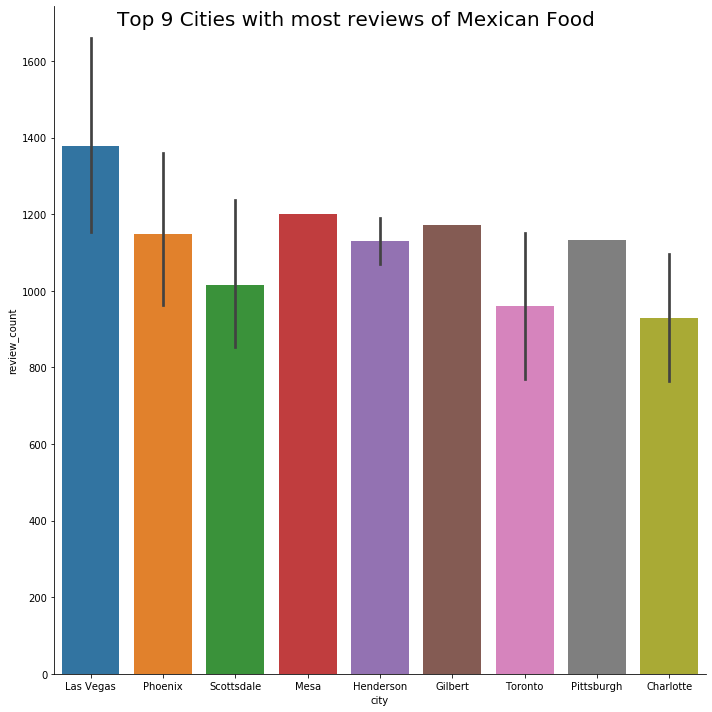

In [0]:
mexi_catplot = sns.catplot(x="city", y="review_count", data = busi_mexi.nlargest(60,'review_count'), kind="bar", height = 10, dodge = True);
mexi_catplot.fig.suptitle('Top 9 Cities with most reviews of Mexican Food', fontsize=20);
plt.savefig("images/city_catplot.jpg")

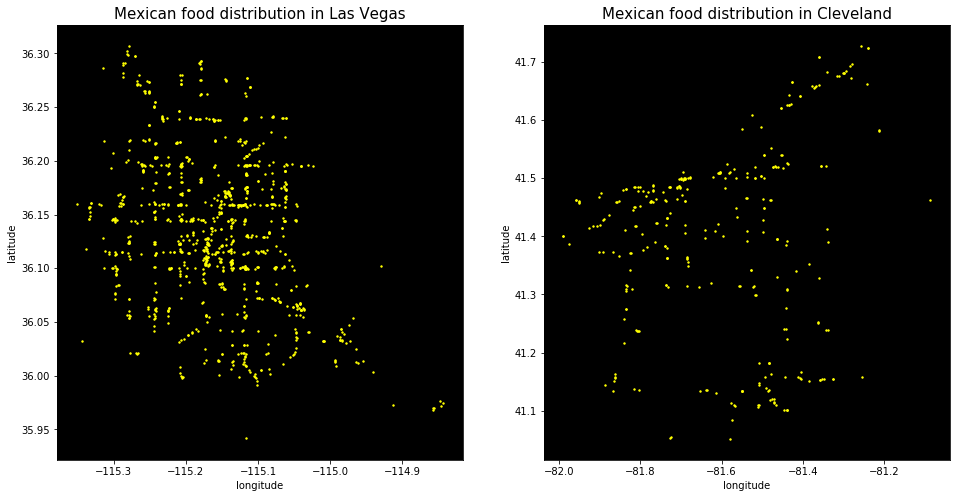

In [0]:
# get position data 
position = busi_mexi[['latitude','longitude','stars','review_count']].copy()
# get popularity
position['popularity'] = position['stars'] * position['review_count']

# the position plot
position_plot, (vegas_plot, clevel_plot) = plt.subplots(1, 2, figsize=(16, 8))

###### for vegas
# a center of vegas
lat = 36
lon = -115
# a range of Vegas
lon_min, lon_max = lon-0.5, lon+0.5
lat_min, lat_max = lat-0.5, lat+0.5
# ice cream business in vegas
vegas = position[(position["longitude"] > lon_min) & (position["longitude"] < lon_max) & (position["latitude"] > lat_min) & (position["latitude"] < lat_max)]
# scatter plot
vegas.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s = 2, fontsize = 10, ax = vegas_plot, subplots = True)
vegas_plot.set_title("Mexican food distribution in Las Vegas", fontsize = 15)
vegas_plot.set_facecolor('black')

###### for clevel
# a center of clevel
lat = 41.5
lon = -81.5
# a range of clevel
lon_min, lon_max = lon-0.5, lon+0.5
lat_min, lat_max = lat-0.5, lat+0.5
# ice cream business in clevel
clevel = position[(position["longitude"] > lon_min) & (position["longitude"] < lon_max) & (position["latitude"] > lat_min) & (position["latitude"] < lat_max)]

# scatter plot
clevel.plot(kind='scatter', x='longitude', y='latitude', color='yellow', s = 2, fontsize = 10, ax = clevel_plot, subplots = True)
clevel_plot.set_title("Mexican food distribution in Cleveland", fontsize = 15)
clevel_plot.set_facecolor('black')

# save the plot
plt.savefig("images/position.jpg")

In [0]:
# make use of the data of attributes
attributes = list(business['attributes'])
for i in range(len(attributes)):
    if attributes[i] == None:
        attributes[i] = {"NoInput": True}
att_df = pd.DataFrame.from_dict(attributes)
att_df.head(3)

,GoodForKids,RestaurantsReservations,GoodForMeal,BusinessParking,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,Ambience,HasTV,WiFi,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,NoInput,BusinessAcceptsBitcoin,ByAppointmentOnly,AcceptsInsurance,Music,GoodForDancing,CoatCheck,HappyHour,BestNights,WheelchairAccessible,DogsAllowed,BYOBCorkage,DriveThru,Smoking,AgesAllowed,HairSpecializesIn,Corkage,BYOB,DietaryRestrictions,Open24Hours,RestaurantsCounterService
0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# merge the data
busi_att = pd.concat([busi_mexi, att_df], axis=1, join='inner')
busi_att.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,GoodForKids,RestaurantsReservations,GoodForMeal,BusinessParking,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,Ambience,HasTV,WiFi,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,NoInput,BusinessAcceptsBitcoin,ByAppointmentOnly,AcceptsInsurance,Music,GoodForDancing,CoatCheck,HappyHour,BestNights,WheelchairAccessible,DogsAllowed,BYOBCorkage,DriveThru,Smoking,AgesAllowed,HairSpecializesIn,Corkage,BYOB,DietaryRestrictions,Open24Hours,RestaurantsCounterService
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,1,False,NaN,"{'romantic': False, 'intimate': False, 'touris...",False,u'no',u'none',u'casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Mexican, Restaurants, Patisserie/Cake Shop, Fo...","{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,'average',NaN,True,1,False,True,"{'romantic': False, 'intimate': False, 'classy...",True,u'no',u'beer_and_wine',u'casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,1614 Queen Street E,Toronto,ON,M4L 1G4,43.666181,-79.316468,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",True,False,NaN,"{'garage': False, 'street': True, 'validated':...",False,u'average',NaN,True,2,False,True,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'none',u'casual',True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Review

In [0]:
review = load_json('review.json')
review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03


In [0]:
revi_mexi = review.loc[review["business_id"].isin(busi_mexi["business_id"]),:]
revi_mexi.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
17,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00
23,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,0,0,0,Pick any meat on the planet and the chef will ...,2016-07-25 03:57:19
43,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,"Party of 3 ordered the fish tacos, pork belly ...",2018-05-28 20:56:05


In [0]:
revi_mexi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403941 entries, 17 to 6685898
Data columns (total 9 columns):
review_id      403941 non-null object
user_id        403941 non-null object
business_id    403941 non-null object
stars          403941 non-null float64
useful         403941 non-null int64
funny          403941 non-null int64
cool           403941 non-null int64
text           403941 non-null object
date           403941 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 30.8+ MB


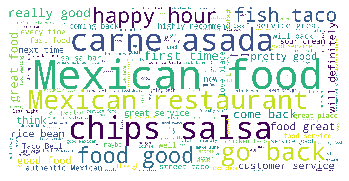

In [0]:
# wordcloud
cloud = revi_mexi.text.values
cloud = "".join(str(s) for s in cloud)
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, random_state=30, scale=10)
wordcloud.generate_from_text(cloud);
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('images/wordcloud.jpg')

In [0]:
# relationship between word and ratings
def distribution(words, review, star):
    data=[]
    stars_category=[1.0,2.0,3.0,4.0,5.0]
    for i in words:
        index=0
        stars=[]
        for j in review:
            if i in j :
                stars.append(star[index])
            index += 1
        data.append(stars)
    for k in range(len(words)):
        counts=[]
        for l in stars_category:
            counts.append(data[k].count(l))
        plt.bar(range(len(counts)), counts, color=['lightsalmon','coral','tomato','orangered','red'], tick_label=stars_category)
        plt.suptitle(words[k],fontsize=30)
        plt.xlabel("stars",fontsize=15)
        plt.ylabel("frequency",fontsize=15)
        plt.show()

In [0]:
word_list = ['carne asada', 'salsa', 'taco', 'hot', 'cold', 'kid', 'charge', 'price', 'awful', 'terrible', 'disaster']

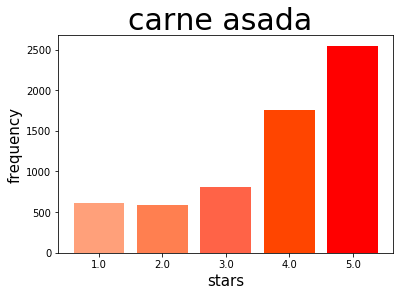

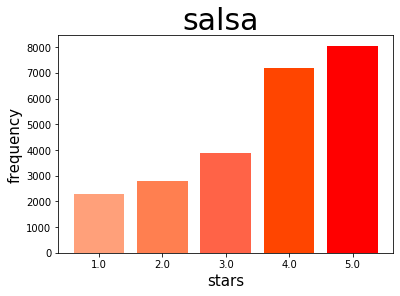

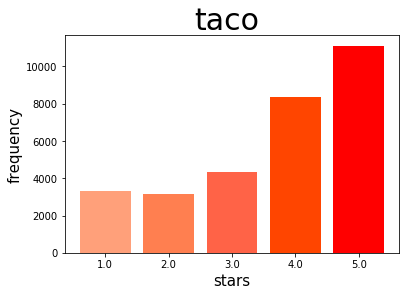

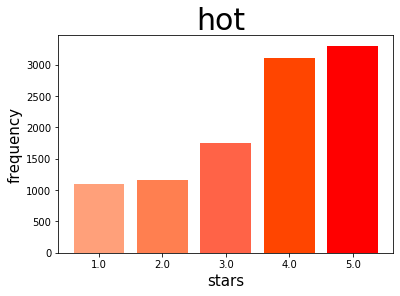

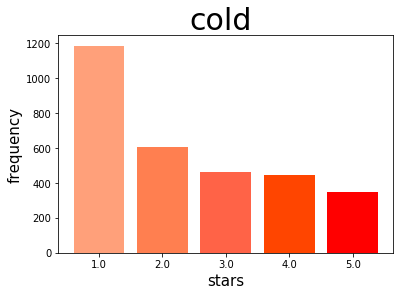

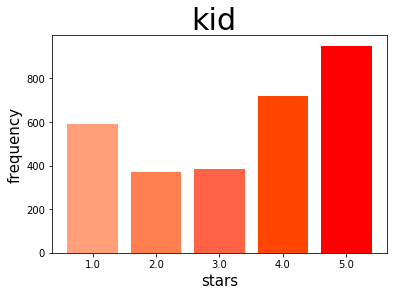

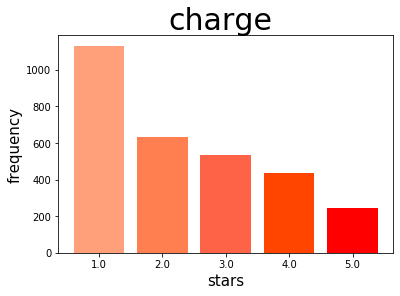

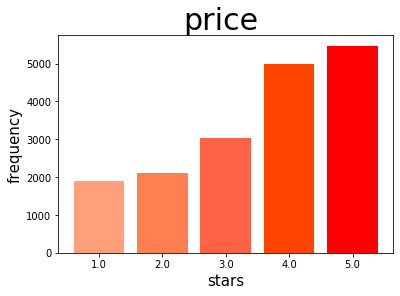

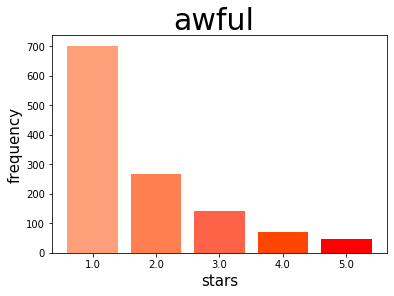

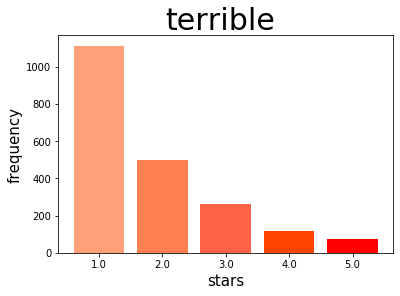

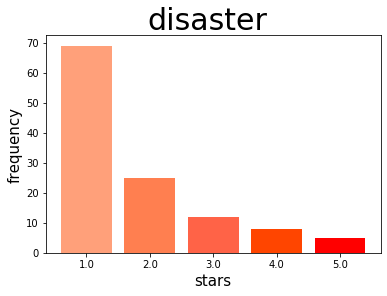

In [0]:
distribution(word_list, revi_mexi.text.values.tolist(), revi_mexi.stars.values.tolist())

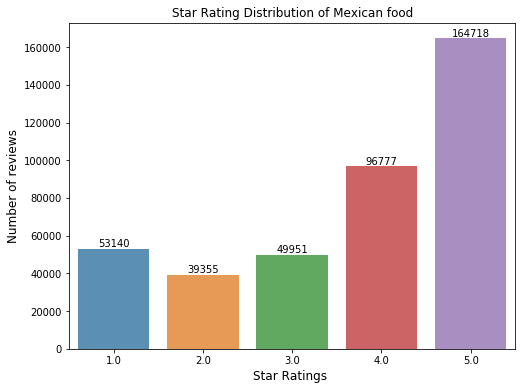

In [0]:
# stars of ice cream business
star = revi_mexi['stars'].value_counts()
star = star.sort_index()
# the barplot
plt.figure(figsize=(8,6))
star_plot = sns.barplot(star.index, star.values, alpha=0.8)
plt.title("Star Rating Distribution of Mexican food")
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
# labels
for rect, label in zip(star_plot.patches, star.values):
    star_plot.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, label, ha='center', va='bottom')
# save the barplot
plt.savefig("images/star_plot.jpg")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

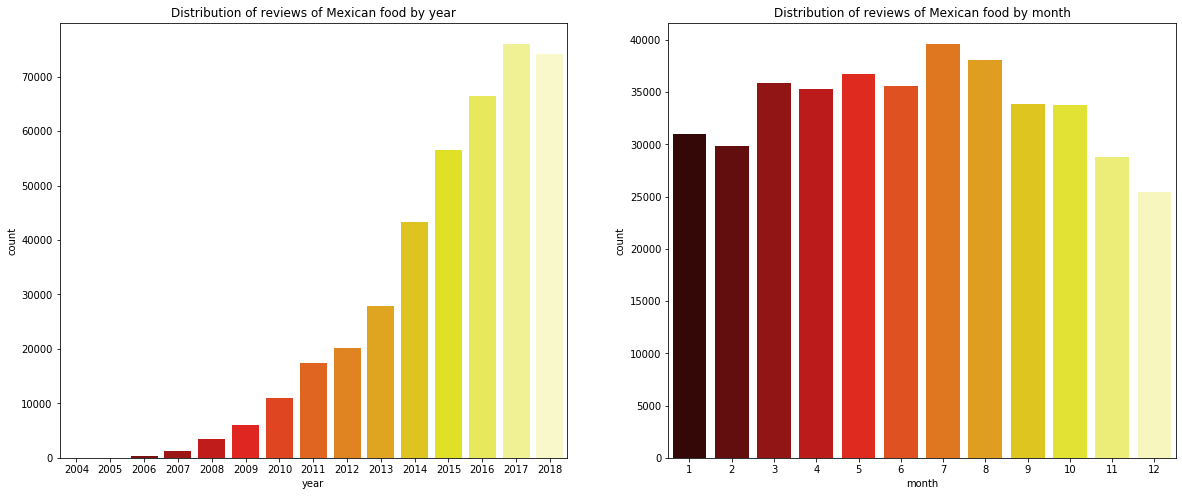

In [0]:
# modify the times
revi_mexi['date'] = pd.to_datetime(revi_mexi['date'])
revi_mexi['year'] = revi_mexi['date'].dt.year
revi_mexi['month'] = revi_mexi['date'].dt.month

f, ax = plt.subplots(1, 2, figsize = (20, 8))
ax1, ax2 = ax.flatten()

# year
cnt = revi_mexi.groupby('year').count().review_id.to_frame()
sns.barplot(cnt.index, cnt['review_id'], palette='hot', ax = ax1)
ax1.set_title('Distribution of reviews of Mexican food by year')
ax1.set_ylabel('count')

# month
cnt = revi_mexi.groupby('month').count().review_id.to_frame()
sns.barplot(cnt.index, cnt['review_id'], palette='hot', ax = ax2)
ax2.set_title('Distribution of reviews of Mexican food by month')
ax2.set_ylabel('count')

# save the plot
plt.savefig("images/time.jpg")

In [0]:
# merge the data frame
mexican = pd.merge(busi_att, revi_mexi, how = "outer", on = "business_id")
mexican.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,GoodForKids,RestaurantsReservations,GoodForMeal,BusinessParking,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,Ambience,HasTV,WiFi,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,NoInput,BusinessAcceptsBitcoin,ByAppointmentOnly,AcceptsInsurance,Music,GoodForDancing,CoatCheck,HappyHour,BestNights,WheelchairAccessible,DogsAllowed,BYOBCorkage,DriveThru,Smoking,AgesAllowed,HairSpecializesIn,Corkage,BYOB,DietaryRestrictions,Open24Hours,RestaurantsCounterService,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month
0,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,1,False,NaN,"{'romantic': False, 'intimate': False, 'touris...",False,u'no',u'none',u'casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QNmY376TXxnanuVVOd6jTQ,Hw8mxfICqErjwIVsC5rXUw,3.0,0,0,0,"I mean it's Taco Bell, so it is what it is. Ho...",2018-09-26 03:26:43,2018,9
1,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,1,False,NaN,"{'romantic': False, 'intimate': False, 'touris...",False,u'no',u'none',u'casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q0uAJsHS8tU9Lxjp8HkH6w,qfA3pCsmjRdKl3CYVZ4p7w,1.0,0,1,0,"1 star for service, but the food is not ok :( ...",2012-03-06 14:06:35,2012,3
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,True,1,False,NaN,"{'romantic': False, 'intimate': False, 'touris...",False,u'no',u'none',u'casual',True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s-1UrmPhWuMtTQk-bearcg,ZQsculZs_WMVFnBGQee1EQ,4.0,1,0,0,Taco Bell has really improved over the years a...,2013-03-22 06:17:38,2013,3


```Star_x``` is the star of business, while ```star_y``` is the star of the review.

In [0]:
mexican.to_csv("data/mexican.csv")

In [0]:
mexican = pd.read_csv("data/mexican.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,36,38,39,40,42,45,47,48,50,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
output = mexican['GoodForMeal'].dropna().apply(lambda x: ast.literal_eval(x))

In [0]:
pd.DataFrame.from_dict(output)

,GoodForMeal
19,"{'dessert': False, 'latenight': False, 'lunch'..."
20,"{'dessert': False, 'latenight': False, 'lunch'..."
21,"{'dessert': False, 'latenight': False, 'lunch'..."
22,"{'dessert': False, 'latenight': False, 'lunch'..."
23,"{'dessert': False, 'latenight': False, 'lunch'..."
...,...
403925,"{'dessert': False, 'latenight': False, 'lunch'..."
403926,"{'dessert': False, 'latenight': False, 'lunch'..."
403927,"{'dessert': False, 'latenight': False, 'lunch'..."
403928,"{'dessert': False, 'latenight': False, 'lunch'..."


In [0]:
import ast
ast.literal_eval(mexican['GoodForMeal'][20])

{'breakfast': False,
 'brunch': False,
 'dessert': False,
 'dinner': True,
 'latenight': False,
 'lunch': True}

## User
We finally choose not to use data from ```user.json``` and ```tips.json```.

In [0]:
# if necessary, use the information from user.json
user = load_json('user.json')
user = user.drop(['cool', 'funny', 'review_count', 'useful','name'], axis=1)
user.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10


In [0]:
final = pd.merge(ice, user, on="user_id", how="left")
final.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since
0,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2015-07-16 13:24:01,0,f9feP-Y-o--4vvPToiW8VQ,5.0,Best ice cream at the lake. Great place to t...,1,iBC1SyHZBOO55tTsdSdfHA,3.88,0,0,0,0,0,0,0,0,0,0,0,1,,0,"S6o1lM5jMe5tNfRgR5JPiw, gVRxmRzoDNWeWKoVBwX6Dw...",1,Don,8,6,2011-11-16 22:14:34
1,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2018-04-28 01:07:42,0,GIiAUcUxQu94Swa9UWJj_A,4.0,Lots of flavors!! They allow ya to try any of ...,0,FhqgZHUjzV6x9uYNs05Q5A,3.92,4,0,4,2,0,0,7,1,5,0,7,133,2018,10,"f_HEIl5aW8LX2i7H6jvMTg, 6YnVS7aorcICJ09iM9y73w...",96,Jennifer,171,236,2012-07-31 10:39:07
2,20801 N Main St,"{'BusinessParking': '{'garage': False, 'street...",9FPEg18SyYsKgbWZ0XDysQ,"Food, Ice Cream & Frozen Yogurt",Cornelius,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,35.491159,-80.858233,Carolina Cones,28031,36,4.5,NC,0,2016-07-15 13:40:05,0,JoXg3Yz4upStaYPFPZq98A,5.0,I took my wife and two kids here on a Friday n...,1,HptInOCjRLz9ddpkbaZpeQ,4.08,0,0,0,0,0,0,0,0,1,0,0,0,,0,"1fyzWwIyoGcjWEIeXwxjsA, ps0Y_WkkywSIQAzTszzGOQ",2,Jason,13,4,2016-07-01 22:43:32


In [0]:
# free RAM
del user
del ice

In [0]:
final.shape

(20227, 43)

In [0]:
final.describe()

,is_open,latitude,longitude,review_count_x,stars_x,cool_x,funny_x,stars_y,useful_x,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,fans,funny_y,review_count_y,useful_y
count,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000
mean,0.772482,38.229592,-97.542382,114.097345,3.989371,0.738864,0.541751,3.990261,1.104712,3.794739,58.119642,2.006921,58.119642,39.904237,1.295397,4.495971,26.248134,23.437831,66.711524,3.101300,21.786474,470.244871,19.491175,344.775201,185.210807,680.036041
std,0.419240,4.473430,16.730805,144.850902,0.616174,2.519779,1.879141,1.244489,2.787722,0.640243,345.963496,21.104430,345.963496,307.803158,12.845063,25.926652,135.749523,210.431459,394.679755,29.046509,122.717323,2789.411382,73.596035,2294.793103,475.280791,3353.072019
min,0.000000,33.217815,-115.334015,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,33.655684,-114.054073,24.000000,3.500000,0.000000,0.000000,3.000000,0.000000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,14.000000,8.000000
50%,1.000000,36.151466,-111.788778,67.000000,4.000000,0.000000,0.000000,4.000000,0.000000,3.840000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16.000000,2.000000,12.000000,52.000000,51.000000
75%,1.000000,41.485917,-80.580601,138.000000,4.500000,1.000000,0.000000,5.000000,1.000000,4.160000,10.000000,0.000000,10.000000,5.000000,0.000000,2.000000,7.000000,2.000000,9.000000,0.000000,6.000000,118.000000,11.000000,86.000000,176.000000,288.000000
max,1.000000,51.292454,-73.457086,707.000000,5.000000,104.000000,66.000000,5.000000,108.000000,5.000000,13015.000000,2254.000000,13015.000000,9917.000000,1306.000000,1441.000000,4659.000000,11129.000000,13077.000000,2331.000000,5670.000000,82128.000000,1574.000000,86122.000000,12390.000000,89418.000000


In [0]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20227 entries, 0 to 20226
Data columns (total 43 columns):
address               20227 non-null object
attributes            19955 non-null object
business_id           20227 non-null object
categories            20227 non-null object
city                  20227 non-null object
hours                 17191 non-null object
is_open               20227 non-null int64
latitude              20227 non-null float64
longitude             20227 non-null float64
name_x                20227 non-null object
postal_code           20227 non-null object
review_count_x        20227 non-null int64
stars_x               20227 non-null float64
state                 20227 non-null object
cool_x                20227 non-null int64
date                  20227 non-null object
funny_x               20227 non-null int64
review_id             20227 non-null object
stars_y               20227 non-null float64
text                  20227 non-null object
useful_x   

In [0]:
# save the data
final.to_csv('ice_data.csv')

## The Text data (X) and stars (y)

In [0]:
text = revi_mexi.text.to_frame()
stars = revi_mexi.stars.to_frame()
final_data = pd.concat([text, stars], axis=1)

final_data.to_csv("data/final_data.csv")
final_data.head()

,text,stars
17,I love chinese food and I love mexican food. W...,3.0
23,Pick any meat on the planet and the chef will ...,5.0
43,"Party of 3 ordered the fish tacos, pork belly ...",5.0
63,Employees were to busy chatting with each othe...,2.0
121,I've been coming to Loco on mill since they op...,5.0


In [0]:
# data shape: (n_samples, 2)
final_data.shape

(403941, 2)

In [0]:
# count of stars
final_data.stars.value_counts()

5.0    164718
4.0     96777
1.0     53140
3.0     49951
2.0     39355
Name: stars, dtype: int64

In [0]:
# check for missing values
final_data.isna().any()

text     False
stars    False
dtype: bool

### Clustering k-means

In [0]:
import jieba 
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans

In [0]:
# clustering
NUM_CLUSTERS = 6

def jieba_tokenize(text):
    return jieba.lcut(text) 

tfidf_vectorizer = TfidfVectorizer(tokenizer=jieba_tokenize, lowercase=True) # tf idf vectorizer
text_list = list(final_data.text.fillna('')) # input text
tfidf_matrix = tfidf_vectorizer.fit_transform(text_list) # tf idfv matrix

km_cluster = KMeans(n_clusters=NUM_CLUSTERS, max_iter=300, n_init=40, init='k-means++',n_jobs=-1)

In [0]:
# fit the result
result = km_cluster.fit_predict(tfidf_matrix)

In [0]:
result

In [0]:
text_list = final_data.text
type(text_list)

pandas.core.series.Series

## load the chosen data 
(Start here if the ```.csv``` file was generated)

In [0]:
final_data = pd.read_csv('data/final_data.csv')
text = final_data.text.fillna('').values
star = final_data.stars.values

## Pre-processing
### Tokenizer

In [0]:
# hyper parameters
MAX_NUM_WORDS = 1000 # the maximum number of words to keep, based on word frequency
MAX_SEQUENCE_LENGTH=100 # max number of words in a review to use (if length of review not enough, padding with 0 in the left)

In [0]:
# lowercase and tokenization
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS, lower=True, split=" ")
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

word_index = tokenizer.word_index # the generated dictionary
print('The length of the dictionary: %s' % len(word_index))

data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
label = keras.utils.to_categorical(np.asarray(star))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', label.shape)

The length of the dictionary: 122150
Shape of data tensor: (403941, 100)
Shape of label tensor: (403941, 6)


In [0]:
# view the data
data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 605, 171, 155,  20,   1,   2,   1,
       729,  62, 133,   4,  45, 397, 327,  17, 107, 159, 594, 176,   2,
        33,   5, 812,  10, 137,  29,  31,  35,  98], dtype=int32)

In [0]:
# check the dictionary
word_index["pick"]

605

In [0]:
# check the text data
text[1]

'Pick any meat on the planet and the chef will make a Mexican style dish with amazing flavor! Wow, fish and lamb tacos to die for. Drinks are great as well.'

In [0]:
## build df for some analhyses
# senti = ["not"] * len(star)
# for i in range(len(star)):
#     if star[i] > 3:
#         senti[i] = 'Posi'
#     else:
#         senti[i] = 'Nega'
# senti[:10]

# output = pd.DataFrame()
# word_dict = pd.DataFrame()
# output['text'] = sequences
# output['star'] = star
# output['senti'] = senti

# word_dict['dict_keys'] = keys
# word_dict['dict_values'] = values

# output.to_csv("data/mexican_token.csv")
# word_dict.to_csv("data/word_dict.csv")

# output.head(3)

,text,star,senti
0,"[3, 87, 12, 2, 3, 87, 45, 12, 71, 86, 52, 362,...",3.0,Nega
1,"[605, 171, 155, 20, 1, 2, 1, 729, 62, 133, 4, ...",5.0,Posi
2,"[474, 7, 140, 64, 1, 176, 33, 209, 241, 204, 2...",5.0,Posi


### Word Embedding

In [0]:
# load the GloVe models
GLOVE_PATH = './models/'
EMBEDDING_DIM = 50

embeddings_index = {}
f = open(os.path.join(GLOVE_PATH, 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Length of word embedding dictionary: %s' % len(embeddings_index))

Length of word embedding dictionary: 400000


In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
embedding_matrix[2]

array([ 0.26818001,  0.14346001, -0.27877   ,  0.016257  ,  0.11384   ,
        0.69923002, -0.51332003, -0.47367999, -0.33074999, -0.13834   ,
        0.27020001,  0.30937999, -0.45012   , -0.4127    , -0.09932   ,
        0.038085  ,  0.029749  ,  0.10076   , -0.25058001, -0.51818001,
        0.34558001,  0.44922   ,  0.48791   , -0.080866  , -0.10121   ,
       -1.37769997, -0.10866   , -0.23201001,  0.012839  , -0.46507999,
        3.84629989,  0.31362   ,  0.13643   , -0.52244002,  0.33019999,
        0.33706999, -0.35600999,  0.32431   ,  0.12041   ,  0.35120001,
       -0.069043  ,  0.36884999,  0.25167999, -0.24517   ,  0.25380999,
        0.1367    , -0.31178001, -0.63209999, -0.25027999, -0.38097   ])

In [0]:
# define embedding layer
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

122150

## Confusion matrix for Attributes

In [0]:
att = pd.read_csv('data/att_data_na.csv')

In [0]:
att = pd.read_csv('data/att_data_filled.csv')

In [0]:
att.head(3)

,Unnamed: 0,business_id,name,latitude,longitude,stars,review_count,is_open,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,dessert,latenight,lunch,dinner,brunch,breakfast,GoodForKids,RestaurantsReservations,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,HasTV,WiFi,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,WheelchairAccessible,...,business_id_imp,name_imp,latitude_imp,longitude_imp,stars_imp,review_count_imp,is_open_imp,romantic_imp,intimate_imp,classy_imp,hipster_imp,divey_imp,touristy_imp,trendy_imp,upscale_imp,casual_imp,dessert_imp,latenight_imp,lunch_imp,dinner_imp,brunch_imp,breakfast_imp,GoodForKids_imp,RestaurantsReservations_imp,Caters_imp,NoiseLevel_imp,RestaurantsTableService_imp,RestaurantsTakeOut_imp,RestaurantsPriceRange2_imp,OutdoorSeating_imp,BikeParking_imp,HasTV_imp,WiFi_imp,Alcohol_imp,RestaurantsAttire_imp,RestaurantsGoodForGroups_imp,RestaurantsDelivery_imp,BusinessAcceptsCreditCards_imp,WheelchairAccessible_imp,park_imp
0,1,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,33.495194,-112.028588,3.0,18,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,'quiet',False,True,1,False,True,False,'no','beer_and_wine','casual',True,False,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False
1,2,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,36.195615,-115.040529,4.5,184,1,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,'average',False,True,1,False,True,True,'no','beer_and_wine','casual',True,False,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,43.666181,-79.316468,3.5,43,1,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,'average',False,True,2,False,True,False,'no','beer_and_wine','casual',True,False,True,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False


In [0]:
def my_matrix(df, attribute, include_NA = False, class_sort = None, level_type = 'numeric'):
    '''
    df: data frame
    attribute: a string of the attribute we want to show
    include_NA: a bool, include missing values or not
    class_sort: a list, the sorted classes, if any
    level_type: numeric or categorical
    '''
    df = df.copy()
    df[attribute].fillna("NA", inplace=True)
    classes = list(df[attribute].unique()) # the classes of this attribute
    
    if class_sort:
        classes = class_sort

    if (not include_NA) and ("NA" in classes):
        classes.remove("NA") # drop "NA"
    
    if level_type == 'numeric':
        level = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
        level.reverse()
        count = [[0] * len(classes) for _ in range(len(level))] # count of each class
        for i in range(df.shape[0]): # index
            for j in range(len(classes)): # classes
                for k in range(len(level)): # stars: 1 ~ 5
                    if (df[attribute][i] == classes[j]) & (df['stars'][i] == level[k]):
                        count[k][j] += 1
                        break
    
    elif level_type == 'categorical':
        level = ['Negative', 'Positive']
        level.reverse()
        count = [[0] * len(classes) for _ in range(len(level))] # count of each class
        for i in range(df.shape[0]): # index
            for j in range(len(classes)): # classes
                if (df[attribute][i] == classes[j]) & (df['stars'][i] <= 3.):
                    count[1][j] += 1
                elif (df[attribute][i] == classes[j]) & (df['stars'][i] > 3.):
                    count[0][j] += 1


    
    confusion_matrix = np.array(count, dtype=np.float64)
    
    plt.figure(figsize=(10,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges) # plot the matrix
    plt.title(attribute + ' vs. Ratings\n', fontdict = {'fontsize': 40})
    plt.colorbar()
    tick_marks_x = np.arange(len(classes))
    tick_marks_y = np.arange(len(level))
    plt.xticks(tick_marks_x, classes, fontsize=20)
    plt.yticks(tick_marks_y, level, fontsize=20)
    
    for i in range(len(classes)):
        for j in range(len(level)):
            plt.text(i, j, format(int(confusion_matrix[j][i])), fontdict = {'fontsize': 20})
    
    plt.ylabel('Ratings', fontsize = 30)
    plt.xlabel('Attribute levels', fontsize = 30)
    plt.tight_layout()
    plt.savefig('images/matrix/' + level_type + '/' + attribute + '.jpg')

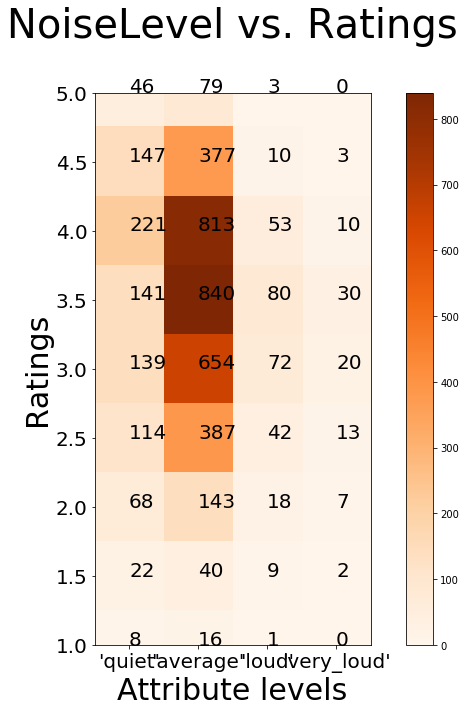

In [0]:
my_matrix(att, 'NoiseLevel', include_NA = False, class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"], level_type = 'numeric')

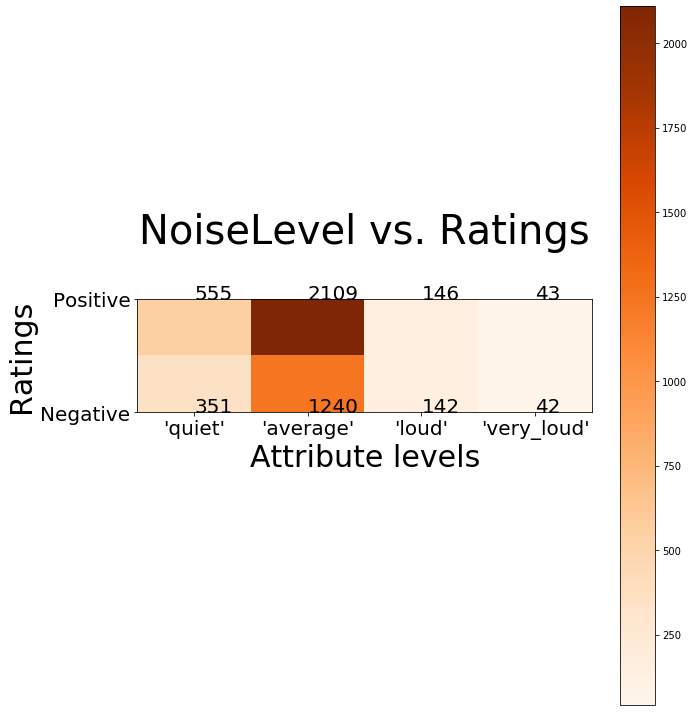

In [0]:
my_matrix(att, 'NoiseLevel', include_NA = False, class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"], level_type = 'categorical')

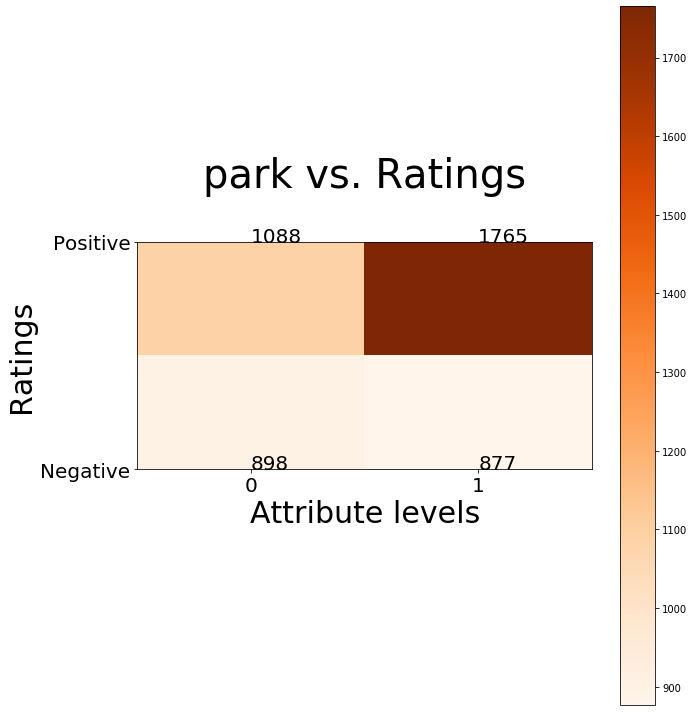

In [0]:
my_matrix(att, 'park', include_NA = False, level_type = 'categorical')

In [0]:
def save_plot_matrixs(df, columns, level_type = 'numeric'):
    '''
    df: attribute data frame
    columns: a list of attributes we want to analyze
    level_type: numeric or categorical
    '''
    for attribute in columns:
        if attribute == "NoiseLevel":
            my_class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"]
        elif attribute == "WiFi":
            my_class_sort = ["'no'", "'free'", "'paid'"]
        elif attribute == "RestaurantsAttire":
            my_class_sort = ["'casual'", "'formal'", "'dressy'"]
        else:
            my_class_sort = None
        my_matrix(att, attribute, class_sort = my_class_sort, level_type=level_type)

In [0]:
save_plot_matrixs(att, columns = att.columns[8:])

Output hidden; open in https://colab.research.google.com to view.

In [0]:
save_plot_matrixs(att, columns = att.columns[8:], level_type='categorical')

Output hidden; open in https://colab.research.google.com to view.

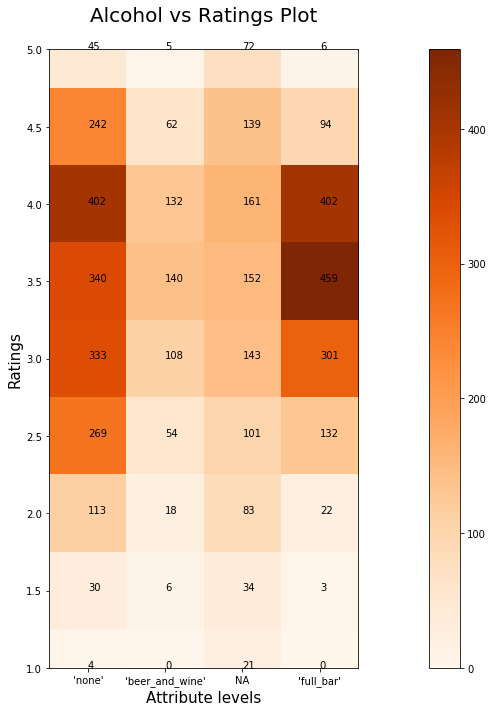

In [0]:
my_matrix(att, 'Alcohol')